In [35]:
import requests
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
endpoint = 'https://api.vndb.org/kana/vn'

# filters = ["and", 
#             ["olang", "=", "ja"],
#             ["popularity", ">=", "90"]]

filters = ["olang", "=", "ja"]

fields = "id, title, released, length_minutes, rating, popularity, tags.id"


query = {
  "filters": filters,
  "fields": fields,
  "sort": "popularity",
  "reverse": True,
  "results": 100,
  "page": 1,
  # "user": False,
  "count": False,
  "compact_filters": False,
  "normalized_filters": False
}

In [38]:
n_pages = 10
dataframes = []

for page in range(1, n_pages+1):
    query['page'] = page
    response = requests.post(endpoint, json=query)
    data = json.loads(response.text)['results']
    dataframes.append(pd.DataFrame(data))

df = pd.concat(dataframes, ignore_index=True)
df

id                                        title  rating    released  \
0       v11                              Fate/stay night    86.1  2004-01-30   
1       v97                                  Saya no Uta    80.1  2003-12-26   
2     v2002                                  STEINS;GATE    90.0  2009-10-15   
3     v5154  Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-    83.8  2011-02-25   
4      v211                             G-senjou no Maou    82.9  2008-05-29   
..      ...                                          ...     ...         ...   
995  v16320                                   Yanderella    57.7  2013-08-29   
996   v8524                     LEWDNESS ~Vita Sexualis~    72.3  2012-06-22   
997  v14886             Hare Nochi Kitto Nanohana Biyori    72.7  2014-08-29   
998  v12186                                  BUNNYBLACK3    74.0  2013-06-21   
999  v18738                                   narcissu 0    71.8  2010-06-24   

                                                  tags  popularity  \
0    [{'id': 'g4'}, {'id': 'g9'}, {'id': 'g6'}, {'i...      100.00   
1    [{'id': 'g23'}, {'id': 'g8'}, {'id': 'g19'}, {...       91.14   
2    [{'id': 'g19'}, {'id': 'g32'}, {'id': 'g147'},...       88.14   
3    [{'id': 'g23'}, {'id': 'g32'}, {'id': 'g292'},...       80.70   
4    [{'id': 'g23'}, {'id': 'g19'}, {'id': 'g32'}, ...       78.95   
..                                                 ...         ...   
995  [{'id': 'g297'}, {'id': 'g349'}, {'id': 'g337'...        1.95   
996  [{'id': 'g1824'}, {'id': 'g2237'}, {'id': 'g49...        1.95   
997  [{'id': 'g23'}, {'id': 'g174'}, {'id': 'g163'}...        1.95   
998  [{'id': 'g23'}, {'id': 'g2'}, {'id': 'g4'}, {'...        1.95   
999  [{'id': 'g763'}, {'id': 'g1772'}, {'id': 'g168...        1.95   

     length_minutes  
0            5160.0  
1             375.0  
2            2636.0  
3            4500.0  
4            2100.0  
..              ...  
995            90.0  
996             NaN  
997          1579.0  
998          3600.0  
999           229.0  

[1000 rows x 7 columns]

In [39]:
df = df.dropna().reset_index(drop=True)
df

id                                        title  rating    released  \
0       v11                              Fate/stay night    86.1  2004-01-30   
1       v97                                  Saya no Uta    80.1  2003-12-26   
2     v2002                                  STEINS;GATE    90.0  2009-10-15   
3     v5154  Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-    83.8  2011-02-25   
4      v211                             G-senjou no Maou    82.9  2008-05-29   
..      ...                                          ...     ...         ...   
951   v7636     '&' - Sora no Mukou de Sakimasu You ni -    71.7  2012-03-30   
952  v16320                                   Yanderella    57.7  2013-08-29   
953  v14886             Hare Nochi Kitto Nanohana Biyori    72.7  2014-08-29   
954  v12186                                  BUNNYBLACK3    74.0  2013-06-21   
955  v18738                                   narcissu 0    71.8  2010-06-24   

                                                  tags  popularity  \
0    [{'id': 'g4'}, {'id': 'g9'}, {'id': 'g6'}, {'i...      100.00   
1    [{'id': 'g23'}, {'id': 'g8'}, {'id': 'g19'}, {...       91.14   
2    [{'id': 'g19'}, {'id': 'g32'}, {'id': 'g147'},...       88.14   
3    [{'id': 'g23'}, {'id': 'g32'}, {'id': 'g292'},...       80.70   
4    [{'id': 'g23'}, {'id': 'g19'}, {'id': 'g32'}, ...       78.95   
..                                                 ...         ...   
951  [{'id': 'g19'}, {'id': 'g1446'}, {'id': 'g2159...        1.95   
952  [{'id': 'g297'}, {'id': 'g349'}, {'id': 'g337'...        1.95   
953  [{'id': 'g23'}, {'id': 'g174'}, {'id': 'g163'}...        1.95   
954  [{'id': 'g23'}, {'id': 'g2'}, {'id': 'g4'}, {'...        1.95   
955  [{'id': 'g763'}, {'id': 'g1772'}, {'id': 'g168...        1.95   

     length_minutes  
0            5160.0  
1             375.0  
2            2636.0  
3            4500.0  
4            2100.0  
..              ...  
951          1680.0  
952            90.0  
953          1579.0  
954          3600.0  
955           229.0  

[956 rows x 7 columns]

In [40]:
df['released'] = pd.to_datetime(df['released'])
df['released_unix'] = (df['released'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df['tags'] = df['tags'].apply(lambda tag_list: [tag['id'] for tag in tag_list])
df['number_tags'] = df['tags'].apply(len)
df

id                                        title  rating   released  \
0       v11                              Fate/stay night    86.1 2004-01-30   
1       v97                                  Saya no Uta    80.1 2003-12-26   
2     v2002                                  STEINS;GATE    90.0 2009-10-15   
3     v5154  Grisaia no Kajitsu -LE FRUIT DE LA GRISAIA-    83.8 2011-02-25   
4      v211                             G-senjou no Maou    82.9 2008-05-29   
..      ...                                          ...     ...        ...   
951   v7636     '&' - Sora no Mukou de Sakimasu You ni -    71.7 2012-03-30   
952  v16320                                   Yanderella    57.7 2013-08-29   
953  v14886             Hare Nochi Kitto Nanohana Biyori    72.7 2014-08-29   
954  v12186                                  BUNNYBLACK3    74.0 2013-06-21   
955  v18738                                   narcissu 0    71.8 2010-06-24   

                                                  tags  popularity  \
0    [g4, g9, g6, g19, g2, g32, g23, g250, g58, g13...      100.00   
1    [g23, g8, g19, g117, g156, g633, g420, g1897, ...       91.14   
2    [g19, g32, g147, g188, g133, g3397, g783, g201...       88.14   
3    [g23, g32, g292, g79, g147, g139, g195, g756, ...       80.70   
4    [g23, g19, g32, g48, g598, g1335, g698, g2390,...       78.95   
..                                                 ...         ...   
951  [g19, g1446, g2159, g1376, g1558, g530, g108, ...        1.95   
952  [g297, g349, g337, g433, g602, g876, g246, g13...        1.95   
953  [g23, g174, g163, g201, g3159, g554, g1713, g1...        1.95   
954  [g23, g2, g4, g274, g154, g2110, g877, g2407, ...        1.95   
955  [g763, g1772, g168, g534, g133, g292, g269, g9...        1.95   

     length_minutes  released_unix  number_tags  
0            5160.0     1075420800          181  
1             375.0     1072396800          117  
2            2636.0     1255564800           99  
3            4500.0     1298592000          137  
4            2100.0     1212019200          133  
..              ...            ...          ...  
951          1680.0     1333065600           43  
952            90.0     1377734400           47  
953          1579.0     1409270400           65  
954          3600.0     1371772800           62  
955           229.0     1277337600           18  

[956 rows x 9 columns]

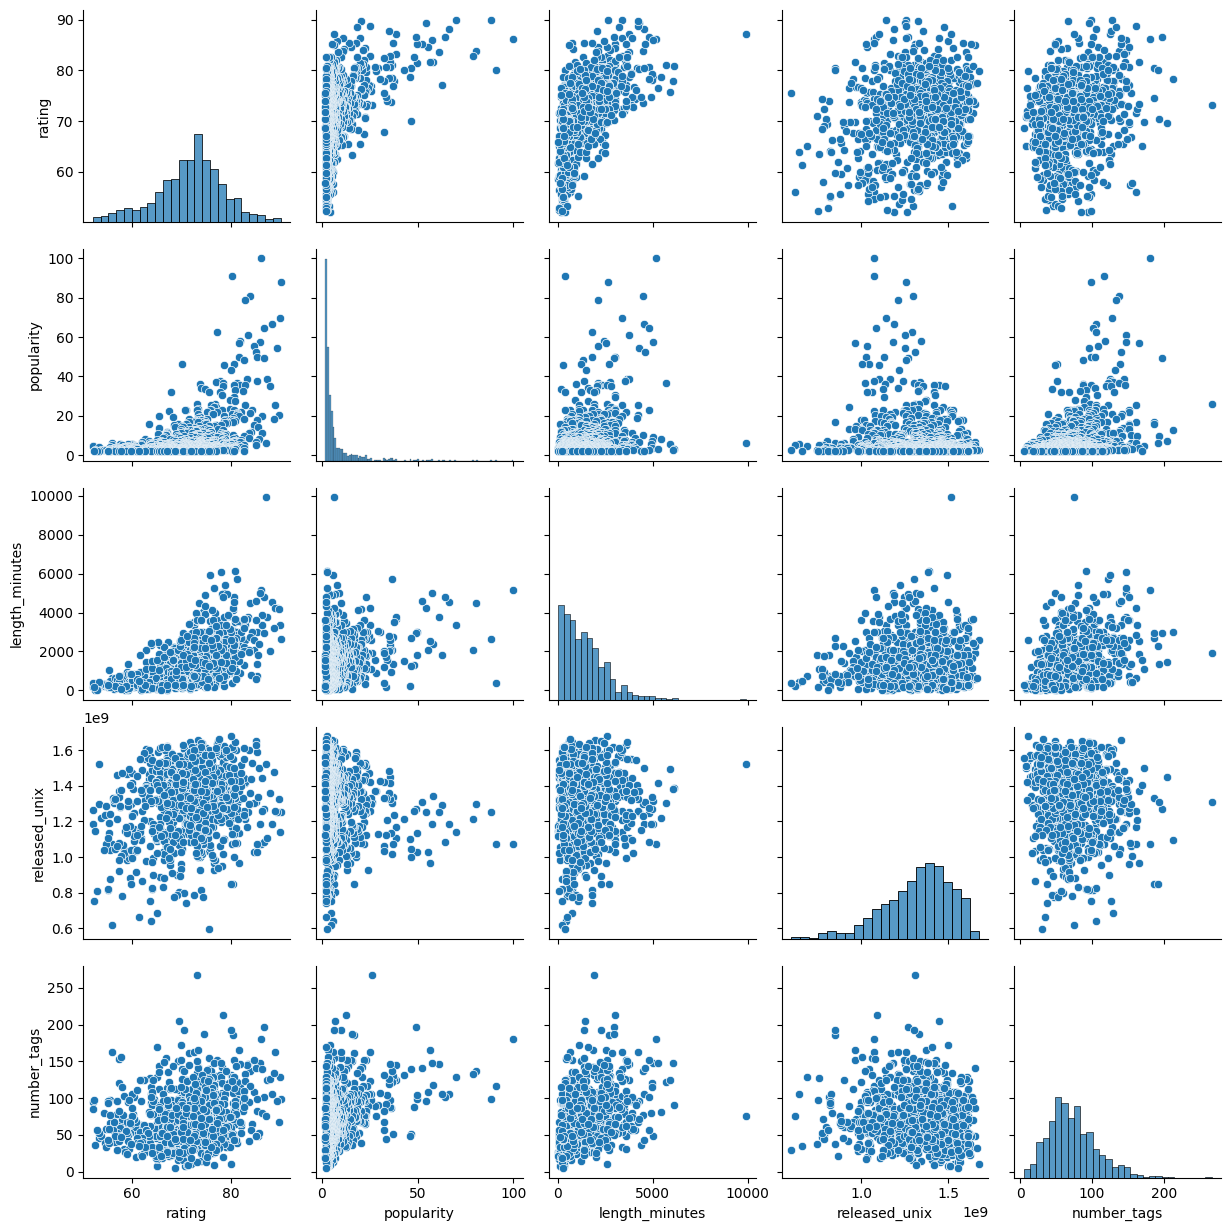

In [41]:
subdf = df[['rating', 'popularity', 'length_minutes', 'released_unix', 'number_tags']]

sns.pairplot(subdf)

Text(0.5, 0, 'Number of tags')

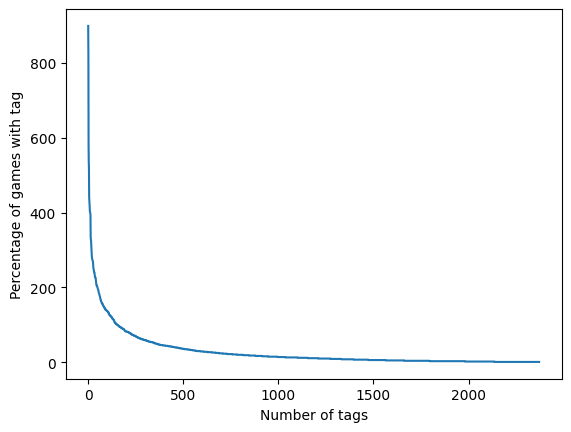

In [42]:
fraction_per_tag = df['tags'].explode().value_counts()

plt.plot(list(fraction_per_tag))
# plt.plot([0, 1450], [10, 10])
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel('Percentage of games with tag')
plt.xlabel('Number of tags')

In [43]:
cutoff_fraction = 10 / 100 * len(df)  # keep tags which appear in x% of games
cutoff_tag = len(fraction_per_tag) - len(fraction_per_tag[fraction_per_tag < cutoff_fraction])  

tags_to_keep = fraction_per_tag[:cutoff_tag].index

fraction_per_tag[:cutoff_tag]

g32      899
g133     823
g728     581
g148     535
g733     517
        ... 
g1343     97
g599      97
g1454     97
g1467     96
g1086     96
Name: tags, Length: 164, dtype: int64

In [44]:
tag_df = pd.DataFrame(np.zeros((len(df), len(tags_to_keep))), columns=tags_to_keep)

for tag in tags_to_keep:
    tag_df[tag] = df['tags'].apply(lambda l: tag in l)

tag_df

g32  g133   g728   g148   g733  g3171   g633    g96  g1581  g1297  ...  \
0     True  True   True   True   True   True   True  False   True   True  ...   
1    False  True   True   True  False  False   True   True   True  False  ...   
2     True  True   True   True  False  False  False   True  False  False  ...   
3     True  True   True   True   True   True   True   True   True   True  ...   
4     True  True   True   True   True   True   True   True   True  False  ...   
..     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
951   True  True   True  False   True  False   True   True  False  False  ...   
952   True  True   True   True  False  False  False  False  False  False  ...   
953   True  True   True   True  False   True   True  False  False  False  ...   
954   True  True   True  False   True   True  False  False   True  False  ...   
955   True  True  False  False  False  False  False  False  False  False  ...   

      g709   g580   g215   g180  g1764  g1343   g599  g1454  g1467  g1086  
0    False  False  False   True  False  False   True  False  False  False  
1    False  False  False  False  False  False  False  False  False  False  
2    False  False  False  False  False   True  False  False  False  False  
3    False  False  False  False  False   True  False  False   True  False  
4    False   True   True   True  False   True  False  False   True  False  
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
951  False  False  False  False  False  False  False  False  False  False  
952  False   True  False  False  False   True  False  False   True  False  
953  False  False   True  False  False  False  False  False  False  False  
954  False  False  False  False  False  False  False  False  False  False  
955   True  False  False  False  False  False  False  False  False  False  

[956 rows x 164 columns]

In [45]:
filters = ['or']
for tag in tag_df.columns:
    filters.append(['id', '=', tag])

n_pages = (len(tags_to_keep) // 100) + 1  # double check, might not work for exactly 100/101.

query = {
    "filters" : filters,
    "fields" : 'id, name',
    "results" : 100,
    "page" : 1
}

tag_name_data = []

for page in range(1, n_pages+1):
    query['page'] = page
    response = requests.post('https://api.vndb.org/kana/tag', json=query)
    tag_name_data.append(pd.DataFrame(json.loads(response.text)['results']))

tag_name_df = pd.concat(tag_name_data)
tag_name_df = tag_name_df[['id', 'name']]
tag_name_dict = dict(tag_name_df.to_numpy())    

tag_df = tag_df.rename(tag_name_dict, axis=1)
tag_names = tag_df.columns
tag_df

ADV  Male Protagonist  Protagonist with a Face  Multiple Endings  \
0     True              True                     True              True   
1    False              True                     True              True   
2     True              True                     True              True   
3     True              True                     True              True   
4     True              True                     True              True   
..     ...               ...                      ...               ...   
951   True              True                     True             False   
952   True              True                     True              True   
953   True              True                     True              True   
954   True              True                     True             False   
955   True              True                    False             False   

     Defloration  High School Student Heroine  Other Perspectives  Romance  \
0           True                         True                True    False   
1          False                        False                True     True   
2          False                        False               False     True   
3           True                         True                True     True   
4           True                         True                True     True   
..           ...                          ...                 ...      ...   
951         True                        False                True     True   
952        False                        False               False    False   
953        False                         True                True    False   
954         True                         True               False    False   
955        False                        False               False    False   

     Cowgirl  Doggy Style  ...  Kinetic Novel  Breaking the Fourth Wall  \
0       True         True  ...          False                     False   
1       True        False  ...          False                     False   
2      False        False  ...          False                     False   
3       True         True  ...          False                     False   
4       True        False  ...          False                      True   
..       ...          ...  ...            ...                       ...   
951    False        False  ...          False                     False   
952    False        False  ...          False                      True   
953    False        False  ...          False                     False   
954     True        False  ...          False                     False   
955    False        False  ...           True                     False   

     Family  Early Branching Plot  Ahegao  Homicide  Food Discussions  \
0     False                  True   False     False              True   
1     False                 False   False     False             False   
2     False                 False   False      True             False   
3     False                 False   False      True             False   
4      True                  True   False      True             False   
..      ...                   ...     ...       ...               ...   
951   False                 False   False     False             False   
952   False                 False   False      True             False   
953    True                 False   False     False             False   
954   False                 False   False     False             False   
955   False                 False   False     False             False   

     Deepthroat  Meaningless Choices  Anilingus  
0         False                False      False  
1         False                False      False  
2         False                False      False  
3         False                 True      False  
4         False                 True      False  
..          ...                  ...        ...  
951       False                False     

c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWa

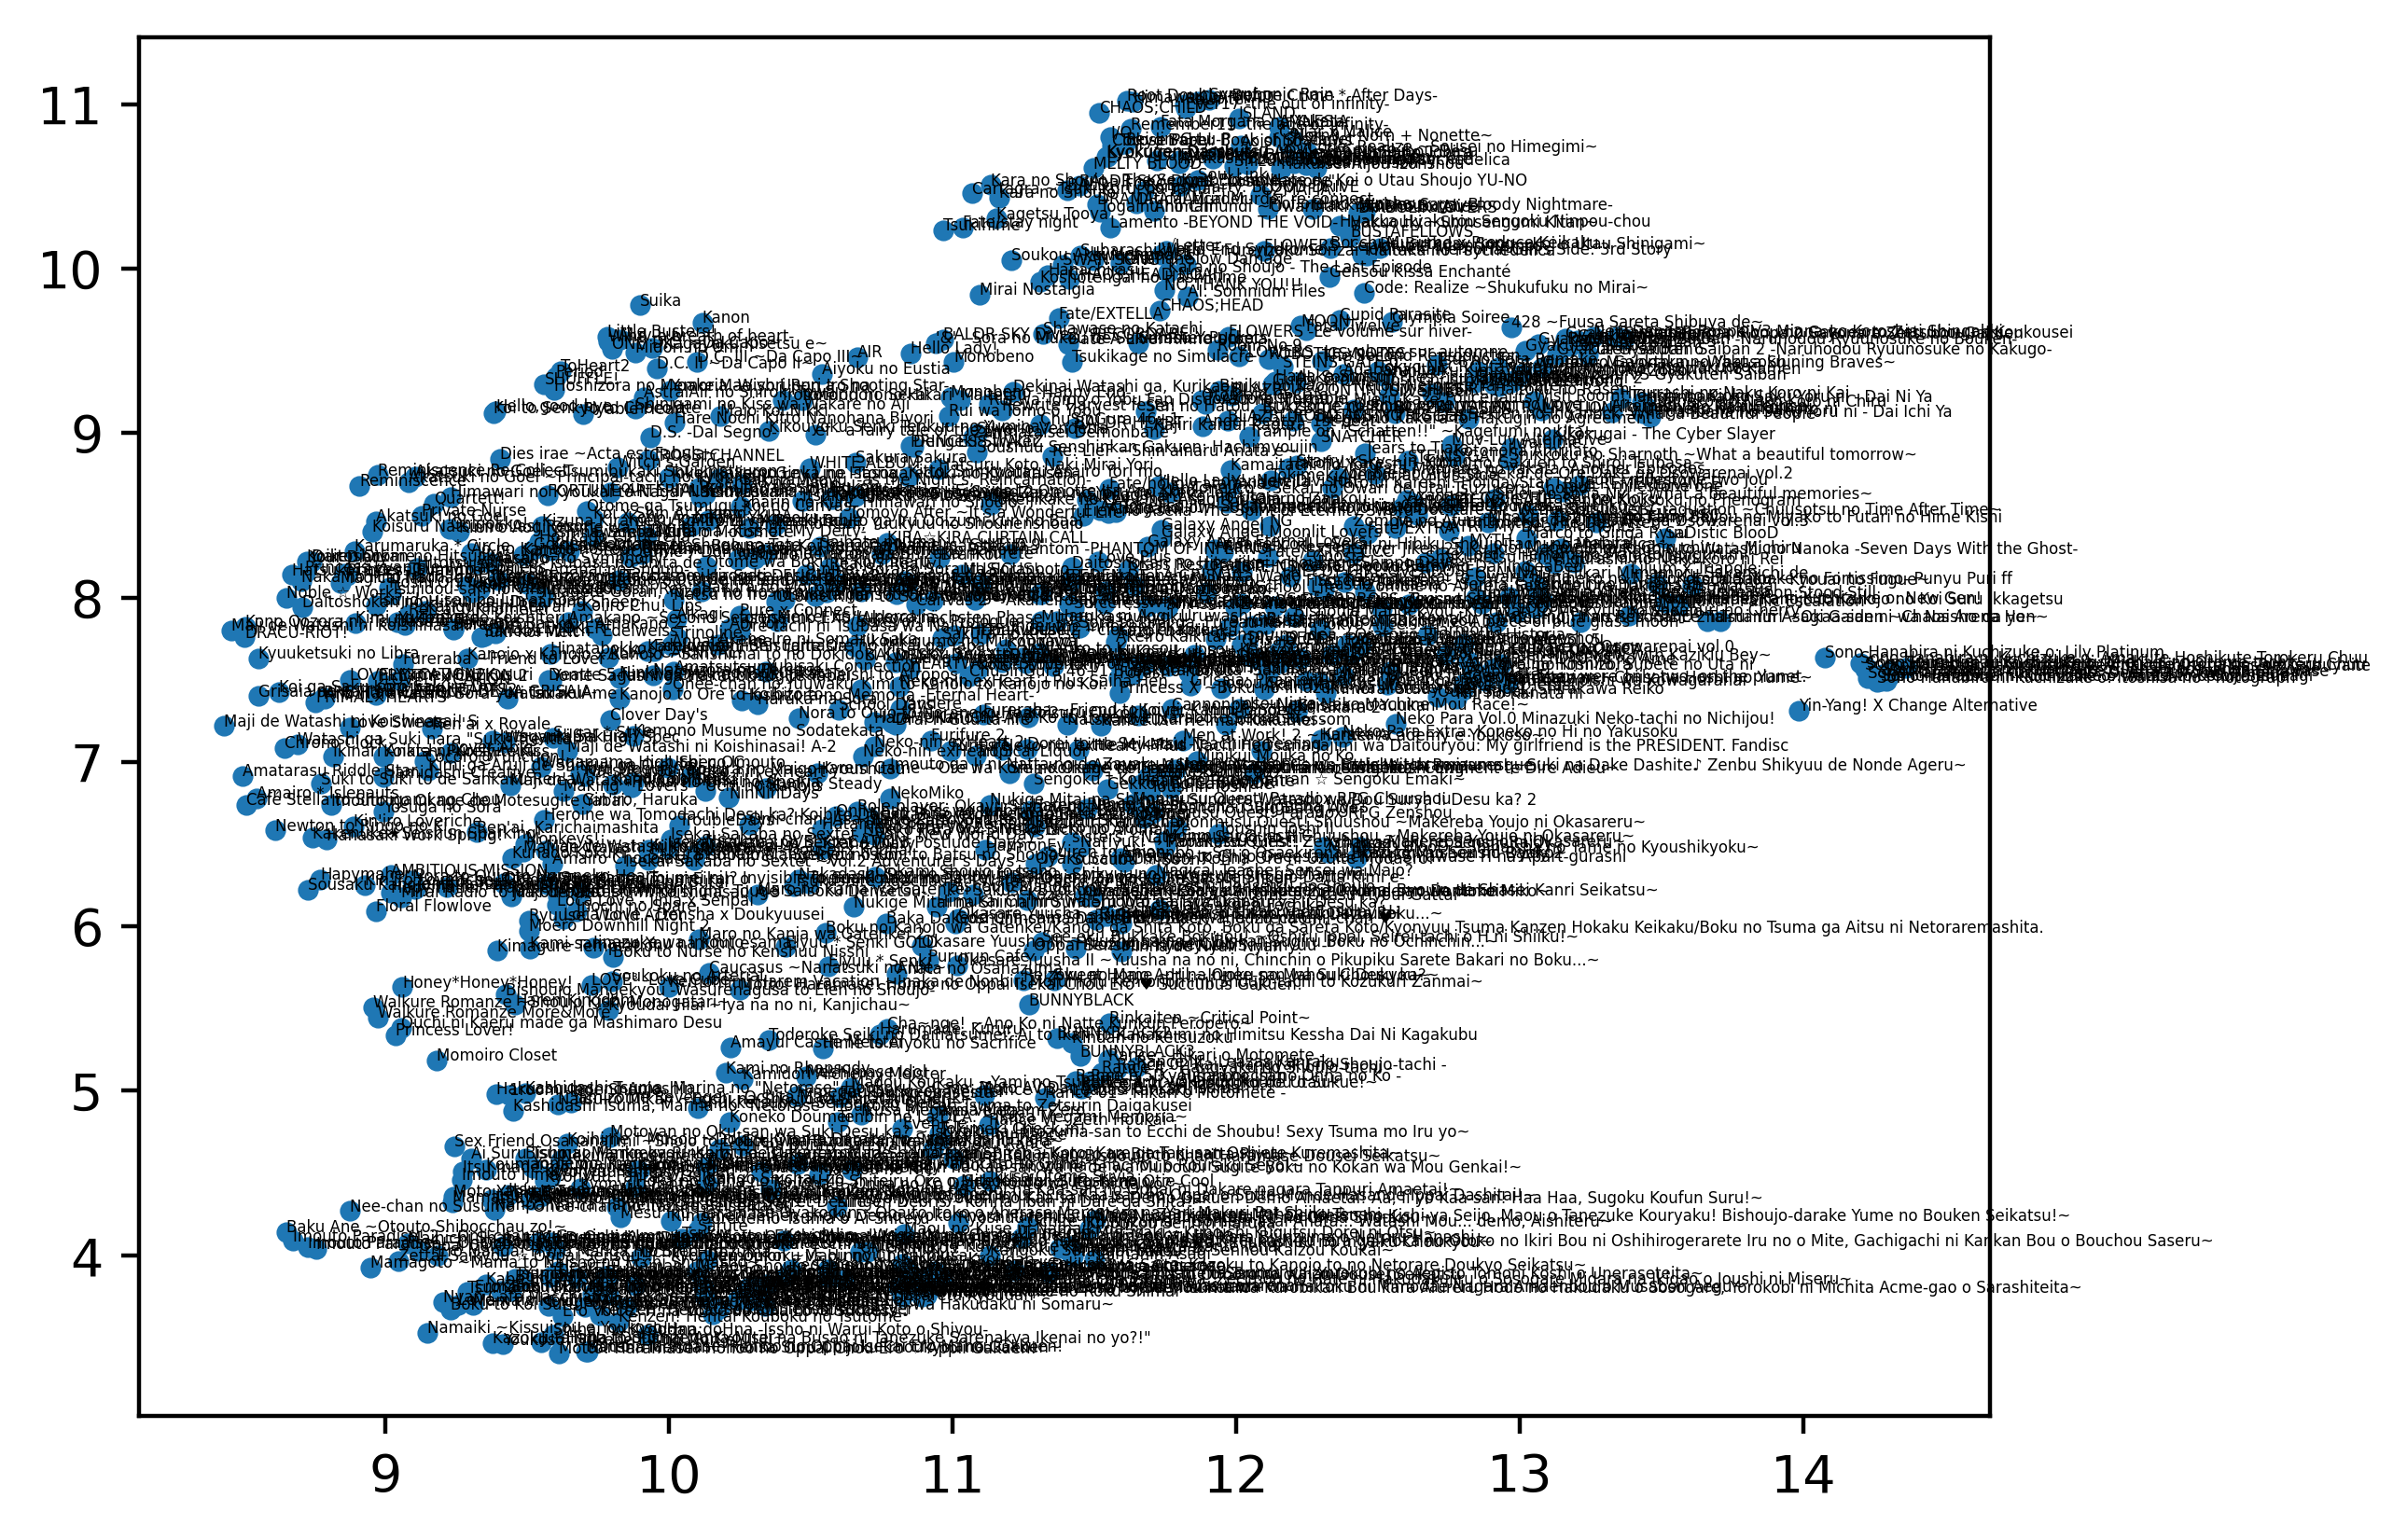

In [46]:
import umap

# running UMAP
# use the non-standardized data X[:, flux_idxs]
map_obj = umap.UMAP()
y_umap = map_obj.fit_transform(tag_df)

fig = plt.figure(dpi=400)

plt.plot(y_umap[:,0], y_umap[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_umap[i, 0], y_umap[i, 1]), fontsize=3)

c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


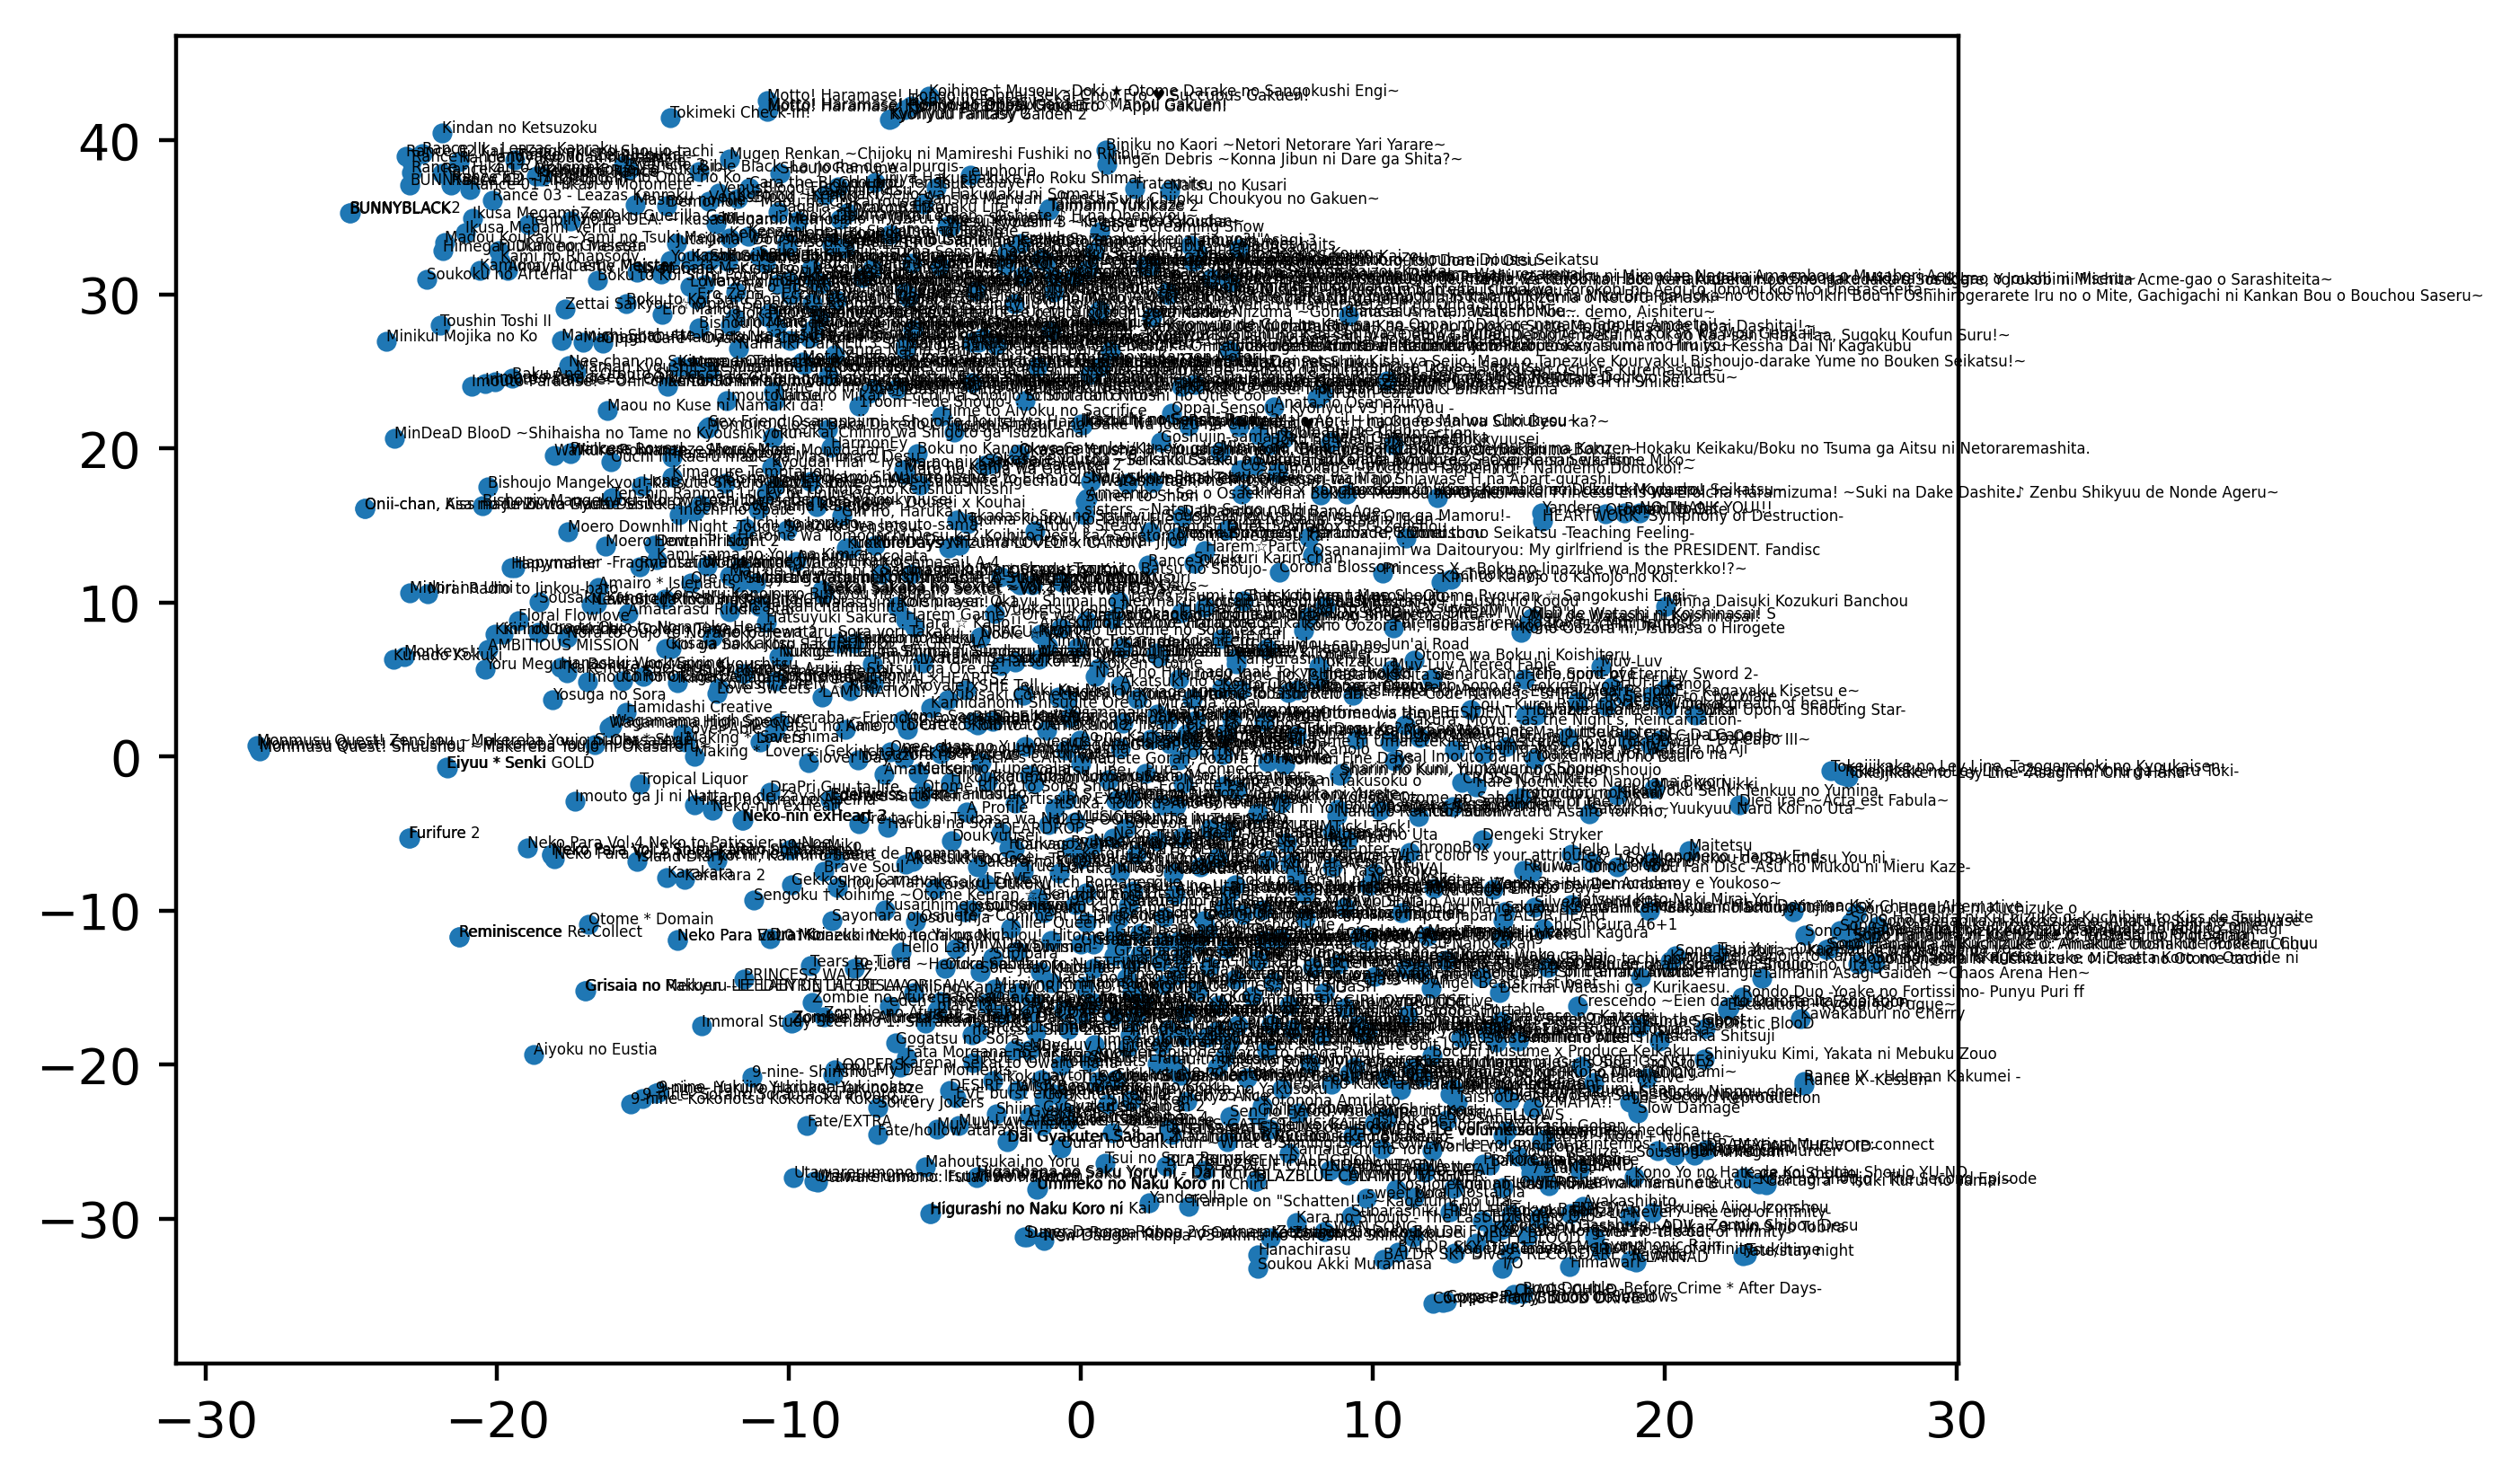

In [47]:
from sklearn.manifold import TSNE

# running t-SNE
# use the non-standardized data X[:, flux_idxs]
tsne = TSNE()
y_tsne = tsne.fit_transform(tag_df)

fig = plt.figure(dpi=400)
plt.plot(y_tsne[:,0], y_tsne[:, 1], '. ')

for i, txt in enumerate(df['title']):
    plt.annotate(txt, (y_tsne[i, 0], y_tsne[i, 1]), fontsize=3)

In [48]:
ML_df = pd.concat((tag_df, df[['length_minutes', 'rating', 'popularity', 'released_unix']]), axis=1)

input_data = ML_df.drop('rating', axis=1)
truth_data = ML_df['rating']

ML_df

ADV  Male Protagonist  Protagonist with a Face  Multiple Endings  \
0     True              True                     True              True   
1    False              True                     True              True   
2     True              True                     True              True   
3     True              True                     True              True   
4     True              True                     True              True   
..     ...               ...                      ...               ...   
951   True              True                     True             False   
952   True              True                     True              True   
953   True              True                     True              True   
954   True              True                     True             False   
955   True              True                    False             False   

     Defloration  High School Student Heroine  Other Perspectives  Romance  \
0           True                         True                True    False   
1          False                        False                True     True   
2          False                        False               False     True   
3           True                         True                True     True   
4           True                         True                True     True   
..           ...                          ...                 ...      ...   
951         True                        False                True     True   
952        False                        False               False    False   
953        False                         True                True    False   
954         True                         True               False    False   
955        False                        False               False    False   

     Cowgirl  Doggy Style  ...  Ahegao  Homicide  Food Discussions  \
0       True         True  ...   False     False              True   
1       True        False  ...   False     False             False   
2      False        False  ...   False      True             False   
3       True         True  ...   False      True             False   
4       True        False  ...   False      True             False   
..       ...          ...  ...     ...       ...               ...   
951    False        False  ...   False     False             False   
952    False        False  ...   False      True             False   
953    False        False  ...   False     False             False   
954     True        False  ...   False     False             False   
955    False        False  ...   False     False             False   

     Deepthroat  Meaningless Choices  Anilingus  length_minutes  rating  \
0         False                False      False          5160.0    86.1   
1         False                False      False           375.0    80.1   
2         False                False      False          2636.0    90.0   
3         False                 True      False          4500.0    83.8   
4         False                 True      False          2100.0    82.9   
..          ...                  ...        ...             ...     ...   
951       False                False      False          1680.0    71.7   
952       False                 True      False            90.0    57.7   
953       False                False      False          1579.0    72.7   
954       False                False      False          3600.0    74.0   
955       False                False      False           229.0    71.8   

     popularity  released_unix  
0        100.00     1075420800  
1         91.14     1072396800  
2         88.14     1255564800  
3         80.70     1298592000  
4         78.95     1212019200  
..          ...            ...  
951        1.95     1333065600  
952        1.95     1377734400  
953        1.95     1409270400  
954        1.95     1371772800  
955        1.95     1277337600  

[956 rows x 168 columns]

In [49]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

ML_df[['length_minutes', 'popularity', 'released_unix', 'rating']] = scalar.fit_transform(ML_df[['length_minutes', 'popularity', 'released_unix', 'rating']])
# ML_df = pd.DataFrame(scalar.fit_transform(ML_df), columns=ML_df.columns)

input_data = ML_df.drop('rating', axis=1)
input_data[tag_names] = input_data[tag_names].astype(int)
truth_data = ML_df['rating']

input_data

ADV  Male Protagonist  Protagonist with a Face  Multiple Endings  \
0      1                 1                        1                 1   
1      0                 1                        1                 1   
2      1                 1                        1                 1   
3      1                 1                        1                 1   
4      1                 1                        1                 1   
..   ...               ...                      ...               ...   
951    1                 1                        1                 0   
952    1                 1                        1                 1   
953    1                 1                        1                 1   
954    1                 1                        1                 0   
955    1                 1                        0                 0   

     Defloration  High School Student Heroine  Other Perspectives  Romance  \
0              1                            1                   1        0   
1              0                            0                   1        1   
2              0                            0                   0        1   
3              1                            1                   1        1   
4              1                            1                   1        1   
..           ...                          ...                 ...      ...   
951            1                            0                   1        1   
952            0                            0                   0        0   
953            0                            1                   1        0   
954            1                            1                   0        0   
955            0                            0                   0        0   

     Cowgirl  Doggy Style  ...  Early Branching Plot  Ahegao  Homicide  \
0          1            1  ...                     1       0         0   
1          1            0  ...                     0       0         0   
2          0            0  ...                     0       0         1   
3          1            1  ...                     0       0         1   
4          1            0  ...                     1       0         1   
..       ...          ...  ...                   ...     ...       ...   
951        0            0  ...                     0       0         0   
952        0            0  ...                     0       0         1   
953        0            0  ...                     0       0         0   
954        1            0  ...                     0       0         0   
955        0            0  ...                     0       0         0   

     Food Discussions  Deepthroat  Meaningless Choices  Anilingus  \
0                   1           0                    0          0   
1                   0           0                    0          0   
2                   0           0                    0          0   
3                   0           0                    1          0   
4                   0           0                    1          0   
..                ...         ...                  ...        ...   
951                 0           0                    0          0   
952                 0           0                    1          0   
953                 0           0                    0          0   
954                 0           0                    0          0   
955                 0           0                    0          0   

     length_minutes  popularity  released_unix  
0          3.291074    8.283608      -1.292992  
1         -0.936123    7.486960      -1.308629  
2          1.061305    7.217215      -0.361428  
3          2.708013    6.548246      -0.138925  
4          0.587788    6.390895      -0.586612  
..              ...         ...            ...  
951        0.216749   -0.532569       0.039346  
952       -1.187899   -0.532569       0.270338  
953        0.127523   -0.532569 

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Always split your dataset into train and validation part. We choose a 75:25 division here. Shuffels dataset before split. By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_valid, truth_train, truth_valid = train_test_split(input_data, truth_data, test_size=0.25, random_state=42)

# Create a NN. Loss function is BinaryCrossEntropy. Output layer has 1 node;the prediction for the rating. Learning rate defaults to 0.001. 
model = Sequential([
    Dense(len(input_train.columns),activation='relu',name='input_layer'),
    Dense(400,activation='relu',name='hidden_layer1'),
    Dense(200,activation='relu',name='hidden_layer2'),
    Dense(200,activation='relu',name='hidden_layer3'),
    Dense(1, activation='selu', name='output')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              # loss=tf.keras.losses.BinaryCrossentropy(),
              # metrics=[tf.keras.losses.BinaryCrossentropy()])
              loss=tf.keras.losses.LogCosh(),
              metrics=[tf.keras.losses.LogCosh()])

print('--------- TRAINING ---------')
history = model.fit(x = np.array(input_train), y = np.array(truth_train), validation_data=(np.array(input_valid), np.array(truth_valid)), epochs = 10)  
## This trains the model on input_train by comparing to the true values in truth_train. After every epoch of training, the model is evaluated on the validation dataset, 
## namely input_valid and truth_valid.

--------- TRAINING ---------
Epoch 1/10
23/23 [==============================] - 1s 9ms/step - loss: 0.3476 - log_cosh: 0.3452 - val_loss: 0.3015 - val_log_cosh: 0.2986
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2822 - log_cosh: 0.2817 - val_loss: 0.2505 - val_log_cosh: 0.2499
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.2279 - log_cosh: 0.2253 - val_loss: 0.2158 - val_log_cosh: 0.2148
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1948 - log_cosh: 0.1933 - val_loss: 0.1957 - val_log_cosh: 0.1950
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1721 - log_cosh: 0.1723 - val_loss: 0.1873 - val_log_cosh: 0.1862
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1545 - log_cosh: 0.1555 - val_loss: 0.1829 - val_log_cosh: 0.1811
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1398 - log_cosh: 0.1444 - val_loss: 0.1732 - val_log_cosh

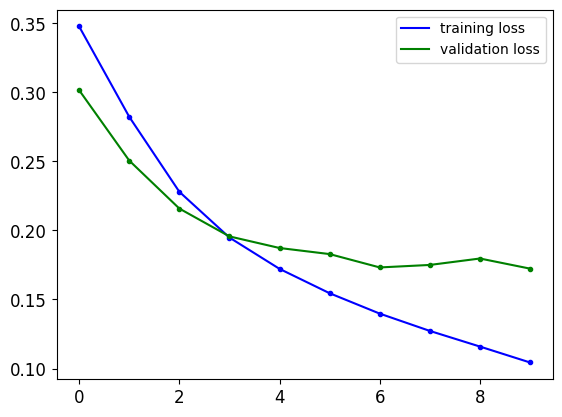

In [51]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig =  plt.figure()
plt.plot(training_loss, 'b', label = 'training loss')
plt.plot(training_loss,'b.')
plt.plot(validation_loss, 'g', label = 'validation loss')
plt.plot(validation_loss, 'g.')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [52]:
abs(model.predict(input_valid)[:,0] - truth_valid).mean()

8/8 [==============================] - 0s 885us/step


0.5001385383859214

8/8 [==============================] - 0s 866us/step


(array([ 7., 10., 16., 24., 51., 63., 40., 22.,  1.,  5.]),
 array([-2.66032171, -2.12406657, -1.58781143, -1.05155629, -0.51530115,
         0.02095399,  0.55720912,  1.09346426,  1.6297194 ,  2.16597454,
         2.70222968]),
 <BarContainer object of 10 artists>)

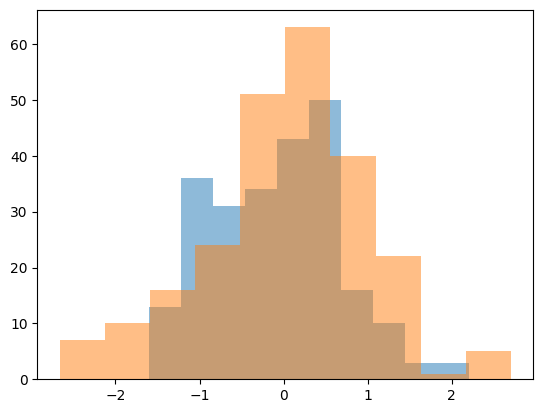

In [53]:
plt.hist(model.predict(input_valid), alpha=0.5)
plt.hist(truth_valid, alpha=0.5)

In [54]:
len(input_valid)

239

In [55]:
import shap

shap.initjs()

shap_rows = shap.sample(input_valid, 100)

# explainer = shap.KernelExplainer(model, input_valid)
# shap_values = explainer.shap_values(input_valid)
explainer = shap.KernelExplainer(model, shap_rows)
shap_values = explainer.shap_values(shap_rows)

c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\GitHub\AppliedML2023\venvAppML\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks,

  0%|          | 0/100 [00:00<?, ?it/s]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  1%|          | 1/100 [00:01<02:31,  1.53s/it]The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipelin

In [56]:
shap.force_plot(explainer.expected_value, shap_values[0][1,:], input_valid.iloc[1,:])


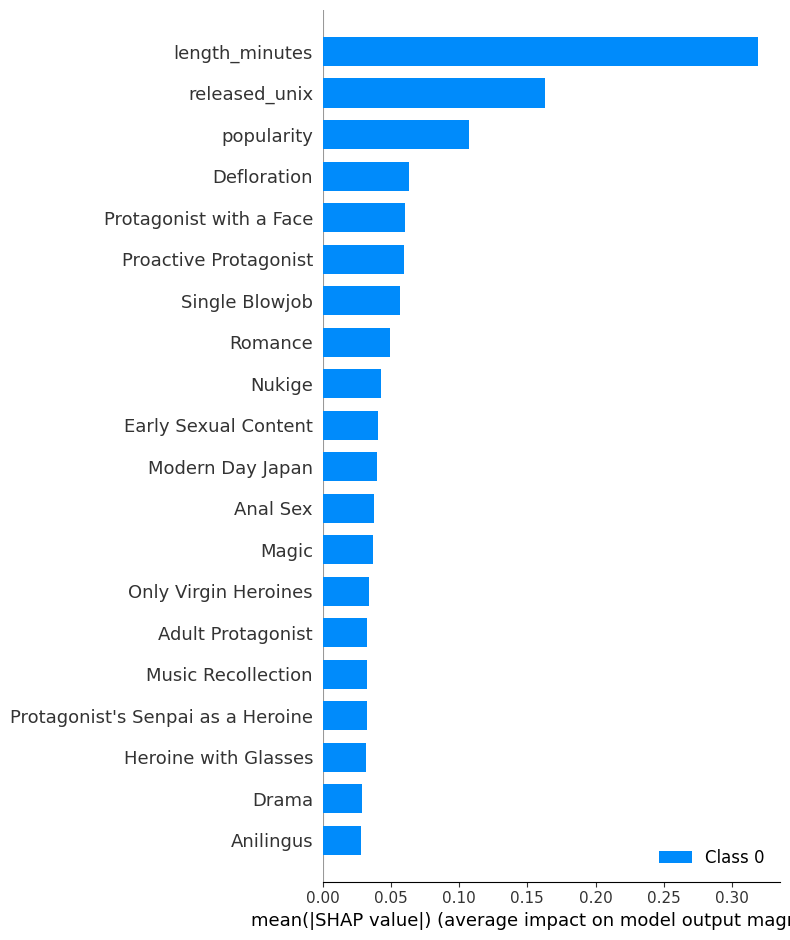

In [57]:
shap.summary_plot(shap_values, input_valid, plot_type="bar")

In [58]:
init_loss = np.mean(tf.keras.losses.log_cosh(model.predict(input_valid), truth_valid))
importance_list = []

for col in input_valid.columns:
    shuffled_df = input_valid.copy()
    shuffled_df[col] = shuffled_df[col].sample(frac=1).values
    new_loss = np.mean(tf.keras.losses.log_cosh(model.predict(shuffled_df), truth_valid))
    importance_list.append((new_loss - init_loss) / init_loss)

importance_df = pd.DataFrame({"imp":importance_list, "col":input_valid.columns})
importance_df['imp'] = importance_df['imp'].apply(abs)
importance_df.sort_values('imp')

8/8 [==============================] - 0s 829us/step


imp                                          col
12   0.000010                     Heroine with Big Breasts
110  0.000016                          Late Sexual Content
27   0.000021  Protagonist's Childhood Friend as a Heroine
60   0.000025                             Deredere Heroine
130  0.000042                                Single Ending
..        ...                                          ...
2    0.008375                      Protagonist with a Face
46   0.015538                        Proactive Protagonist
40   0.016583                                       Nukige
165  0.037319                                   popularity
164  0.059492                               length_minutes

[167 rows x 2 columns]